In [24]:
import pandas as pd
from pathlib import Path

In [25]:
ethereum_tweets = pd.read_csv(
    Path("Ethereum_tweets.csv",
    index_col='date', 
    parse_dates=True, 
    infer_datetime_format=True
)).dropna()

ethereum_tweets.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1,Reyrey,Kuala Lumpur,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,False,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...","['SupportingCreators', 'CryptoArt', 'CryptoArt...",Twitter for iPhone,False
7,"Lucas, Rarible.com: BricksNft - buy,yet cheap..😀","London, England","Brick's nft artist ,limited collections for va...",2021-07-14 10:45:01+00:00,76,1011,306,False,2021-11-15 07:25:36+00:00,"I've just minted ""Waterfall graph "" collectibl...","['rarible', 'ethereum', 'flow', 'nonfungible']",Twitter for Android,False
9,SURYAKAMAL,Jaipur,⚽Goal \n\n🎧Music \n\n🏁Bike Rider \n\n📞 +9189...,2012-03-20 09:35:32+00:00,696,363,869,False,2021-11-15 07:25:14+00:00,You can do Cloud Mining using this site https:...,"['mining', 'dogemining', 'trxmining', 'btcmini...",Twitter for Android,False
13,Crypto.Pil◎t.S◎L,United States,#Bitcoin \n#Ethereum\n#Solana,2019-12-25 13:42:25+00:00,285,1408,23606,False,2021-11-15 07:24:48+00:00,@michaeljburry @elonmusk @BernieSanders Just #...,"['Bitcoin', 'Ethereum']",Twitter for Android,False
15,عَمرو عَیَّار,Fantasy Land,Amro is a fictional character of old Arabic st...,2021-03-24 18:14:48+00:00,302,299,7205,False,2021-11-15 07:24:36+00:00,Top 10 coins by 3-months Twitter Volume \n\n$b...,"['bitcoin', 'ethereum', 'shibainu', 'pancakesw...",Twitter Web App,False


In [26]:
ethereum_tweets = ethereum_tweets[["date", "text", "hashtags"]]
ethereum_tweets


,date,text,hashtags
1,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...","['SupportingCreators', 'CryptoArt', 'CryptoArt..."
7,2021-11-15 07:25:36+00:00,"I've just minted ""Waterfall graph "" collectibl...","['rarible', 'ethereum', 'flow', 'nonfungible']"
9,2021-11-15 07:25:14+00:00,You can do Cloud Mining using this site https:...,"['mining', 'dogemining', 'trxmining', 'btcmini..."
13,2021-11-15 07:24:48+00:00,@michaeljburry @elonmusk @BernieSanders Just #...,"['Bitcoin', 'Ethereum']"
15,2021-11-15 07:24:36+00:00,Top 10 coins by 3-months Twitter Volume \n\n$b...,"['bitcoin', 'ethereum', 'shibainu', 'pancakesw..."
...,...,...,...
9980,2021-11-14 13:44:13+00:00,"💰13,397,043 #USDT (13,397,043 USD) move from u...",['USDT']
9985,2021-11-14 13:43:41+00:00,Best wishes to the creative #NFTartists for th...,"['NFTartists', 'NFTs']"
9988,2021-11-14 13:43:25+00:00,@APompliano Suni (@sunifoundation) Ecosystem i...,"['ADA', 'Solana', 'XRP', 'Bitcoin', 'BNB']"
9992,2021-11-14 13:43:08+00:00,"💰13,403,805 #USDT (13,403,805 USD) move from u...",['USDT']


## MODIFIED CODE: CHANGED DATE TIME FORMAT TO EXCLUDE TIME ZONE AND MILLISECONDS

In [37]:

# Convert the 'date' column to string
ethereum_tweets['date'] = ethereum_tweets['date'].astype(str)

# Changing the date format to stop as seconds (excluding milliseconds)
# Remove the '+00:00' timezone format and parse the dates
ethereum_tweets['date'] = pd.to_datetime(ethereum_tweets['date'].str.replace(r'\+\d{2}:\d{2}', '', regex=True), format='%Y-%m-%d %H:%M:%S')

In [38]:
#get rid of links and hashtags
ethereum_tweets["text"] = ethereum_tweets["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters
ethereum_tweets = ethereum_tweets.replace(r'\W+', ' ', regex=True)


# get rid of tweet duplicates to not bias the sentiment analysis
ethereum_tweets = ethereum_tweets.drop_duplicates(subset=['text'])
ethereum_tweets

,date,text,hashtags
1,2021-11-15 07:26:35,Adopted a Hypocat 053 Crazy Rich Cat Supportin...,SupportingCreators CryptoArt CryptoArtist
7,2021-11-15 07:25:36,I ve just minted Waterfall graph collectible r...,rarible ethereum flow nonfungible
9,2021-11-15 07:25:14,You can do Cloud Mining using this site mining...,mining dogemining trxmining btcmining money
13,2021-11-15 07:24:48,Just Bitcoin and Ethereum,Bitcoin Ethereum
15,2021-11-15 07:24:36,Top 10 coins by 3 months Twitter Volume btc bi...,bitcoin ethereum shibainu pancakeswap
...,...,...,...
9976,2021-11-14 13:44:20,Thanks and to nft NFTCommmunity nftart Ethereu...,nft NFTCommmunity nftart Ethereum nftcollecto...
9977,2021-11-14 13:44:20,Yep But not on Ethereum Use Tron instead,Ethereum Tron
9980,2021-11-14 13:44:13,13 397 043 USDT 13 397 043 USD move from unkn...,USDT
9992,2021-11-14 13:43:08,13 403 805 USDT 13 403 805 USD move from unkn...,USDT


In [39]:
!pip install textblob

!pip install spacy
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dsoph\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

     --------------------------------------- 13.9/13.9 MB 16.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
# In this code, we're using SpaCy for tokenization and part-of-speech tagging, and TextBlob for sentiment analysis. We define a custom analyze_sentiment function that takes a text input, processes it with SpaCy and TextBlob, and returns the sentiment label and polarity score.

In [41]:
import spacy
from textblob import TextBlob

nlp = spacy.load('en_core_web_sm')

def analyze_sentiment(text):
    doc = nlp(text)
    blob = TextBlob(text)
    
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment, polarity

# Assuming df is your DataFrame with 'text' column
ethereum_tweets['sentiment'], ethereum_tweets['polarity'] = zip(*ethereum_tweets['text'].apply(analyze_sentiment))

df_sentiment = ethereum_tweets.sort_values('polarity').reset_index(drop=True)
print(df_sentiment)


                    date                                               text  \
0    2021-11-14 17:02:38  The UNICAT NFT is going to be insane Ethereum ...   
1    2021-11-15 05:45:24   BORING Bitcoin oportal Ethereum GameFi NFT De...   
2    2021-11-15 06:23:28   BORING Bitcoin oPortal Ethereum crosschain Ga...   
3    2021-11-15 02:09:45  Almost lost the channel on ETH If this keeps g...   
4    2021-11-14 17:21:04   BORING Bitcoin oPortal Ethereum crosschain Ga...   
...                  ...                                                ...   
3008 2021-11-14 14:47:19  HunterD9011 found ethereum in a User vault at ...   
3009 2021-11-14 20:01:08  Axlbul found ethereum in a User vault at this ...   
3010 2021-11-14 23:34:35  JasL15 found ethereum in a User vault at this ...   
3011 2021-11-15 02:42:16  IDFK found ethereum in this User Vault located...   
3012 2021-11-14 16:20:57  SidTripp found ethereum in a User vault at thi...   

                                               hash

In [42]:
df_sentiment["sentiment"].value_counts()

neutral     1331
positive    1040
negative     642
Name: sentiment, dtype: int64

In [43]:
positive_count = df_sentiment[df_sentiment['polarity'] > 0]['polarity'].count()
negative_count = df_sentiment[df_sentiment['polarity'] < 0]['polarity'].count()
neutral_count = df_sentiment[df_sentiment['polarity'] == 0]['polarity'].count()

print("Positive count:", positive_count)
print("Negative count:", negative_count)
print("Neutral count:", neutral_count)

Positive count: 1040
Negative count: 642
Neutral count: 1331


In [44]:
# Before analyzing the content of the tweets, we are first going to preprocess our data even more. There are several preprocessing strategies we are going to:

#Lemmatize each word
#Delete extra characters
#Remove stop words

In [45]:
import spacy
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords

# Define the counter variable
counter = 0

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def preprocess(sentence, stemming=False, lemmatizing=False):
    global counter
    counter += 1
    if counter % 100 == 0:
        pass
        # print(counter)

    sentence = str(sentence)
    tokenizer = RegexpTokenizer(r'\w+')

    sentence = sentence.lower()
    sentence = sentence.replace('{html}', "")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokens = tokenizer.tokenize(rem_num)

    filtered_words = [w for w in tokens if len(w) > 2 and w not in stopwords.words('english')]

    if lemmatizing:
        doc = nlp(" ".join(filtered_words))
        lemma_words = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
        return " ".join(lemma_words)

    if stemming:
        stemmer = PorterStemmer()
        stem_words = [stemmer.stem(w) for w in filtered_words]
        return " ".join(stem_words)

    return " ".join(filtered_words)

# Example usage
df_sentiment['text'] = df_sentiment['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
df_sentiment

,date,text,hashtags,sentiment,polarity
0,2021-11-14 17:02:38,unicat nft go insane ethereum erctoken,NFT Ethereum ERC20tokens,negative,-1.0
1,2021-11-15 05:45:24,boring bitcoin oportal ethereum gamefi nft def...,Bitcoin oportal Ethereum GameFi NFT DeFi,negative,-1.0
2,2021-11-15 06:23:28,boring bitcoin oportal ethereum crosschain gam...,Bitcoin oPortal Ethereum crosschain GameFi NF...,negative,-1.0
3,2021-11-15 02:09:45,lose channel eth keep go insane week ethereum,Ethereum,negative,-1.0
4,2021-11-14 17:21:04,boring bitcoin oportal ethereum crosschain gam...,Bitcoin oPortal Ethereum crosschain Gamefi NF...,negative,-1.0
...,...,...,...,...,...
3008,2021-11-14 14:47:19,hunterd find ethereum user vault location join...,ethereum coinhuntworld,positive,1.0
3009,2021-11-14 20:01:08,axlbul find ethereum user vault location join ...,ethereum coinhuntworld,positive,1.0
3010,2021-11-14 23:34:35,jasl find ethereum user vault location join pl...,ethereum coinhuntworld,positive,1.0
3011,2021-11-15 02:42:16,idfk find ethereum user vault locate archibald...,ethereum archibaldsisters,positive,1.0


In [46]:
# Let us extract the most common words found in both positive and negative positive reviews

In [47]:
df_neg = df_sentiment[df_sentiment['polarity'] < 0]
df_pos = df_sentiment[df_sentiment['polarity'] > 0]

In [48]:
# Amount of positive and negative reviews we have been inferring from our data,
# Let's a have general idea about the opinion of the public regarding Ethereum tweets:
print("Negative reviews", len(df_neg))
print("Positive reiews", len(df_pos))

Negative reviews 642
Positive reiews 1040


In [49]:
from collections import Counter

# Extracting the most common words found in both positive and negative positive reviews:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [50]:
display("Most common words in POSITIVE tweets on ETH:",positive_words)
display("Most common words in NEGATIVE tweets on ETH:",negative_words)

'Most common words in POSITIVE tweets on ETH:'

Index(['ethereum', 'nft', 'eth', 'bitcoin', 'crypto', 'btc', 'cryptocurrency',
       'nftcollector', 'blockchain', 'nftcommunity', 'shib', 'dogecoin',
       'solana', 'bnb', 'nftartist', 'binance', 'new', 'altcoin', 'nftart',
       'project', 'doge', 'join', 'opensea', 'defi', 'good', 'art', 'rarible',
       'ada', 'find', 'xrp', 'coin', 'cryptoart', 'nftdrop', 'nftgiveaway',
       'awesome', 'user', 'cryptocurrencie', 'play', 'sol', 'digitalart',
       'cardano', 'like', 'vault', 'coinhuntworld', 'nfts', 'buy', 'price',
       'location', 'safemoon', 'bsc', 'shibainu', 'digitalasset',
       'nonfungible', 'openseanft', 'amp', 'flow', 'cryptoartist', 'shiba',
       'look', 'metaverse', 'pancakeswap', 'gas', 'money', 'worth', 'news',
       'love', 'high', 'day', 'cryptotrade', 'cryptonew', 'follow', 'trading',
       'come', 'time', 'lunarshare', 'nftcollectible', 'giveaway', 'drop',
       'market', 'invest', 'nftcollection', 'free', 'world', 'bscgem',
       'cryptotwitter', 

'Most common words in NEGATIVE tweets on ETH:'

Index(['ethereum', 'nft', 'collectible', 'rarible', 'digitalasset',
       'nonfungible', 'flow', 'eth', 'look', 'find', 'mint', 'blockchain',
       'bitcoin', 'wallet', 'crypto', 'unknown', 'usd', 'detail', 'symbol',
       'date', 'gmt', 'btc', 'nftcollector', 'cryptocurrency', 'nftcommunity',
       'opensea', 'art', 'bear', 'nftart', 'binance', 'shib', 'usdt',
       'nftartist', 'usdc', 'defi', 'openseanft', 'gas', 'nfts', 'amp',
       'cryptoart', 'altcoin', 'polygon', 'go', 'digitalart', 'price',
       'solana', 'game', 'fee', 'bnb', 'dogecoin', 'green', 'nftdrop', 'busd',
       'nftgiveaway', 'xrp', 'month', 'link', 'buy', 'like', 'nftcollection',
       'time', 'day', 'coin', 'week', 'polygonnft', 'low', 'new', 'mana',
       'bsc', 'etherium', 'exchange', 'token', 'sale', 'hard', 'venus', 'sol',
       'cryptocurrencie', 'cryptotrade', 'previous', 'shiba', 'project',
       'nftcommmunity', 'gamefi', 'market', 'high', 'trading', 'drake',
       'metaverse', 'long', 'money

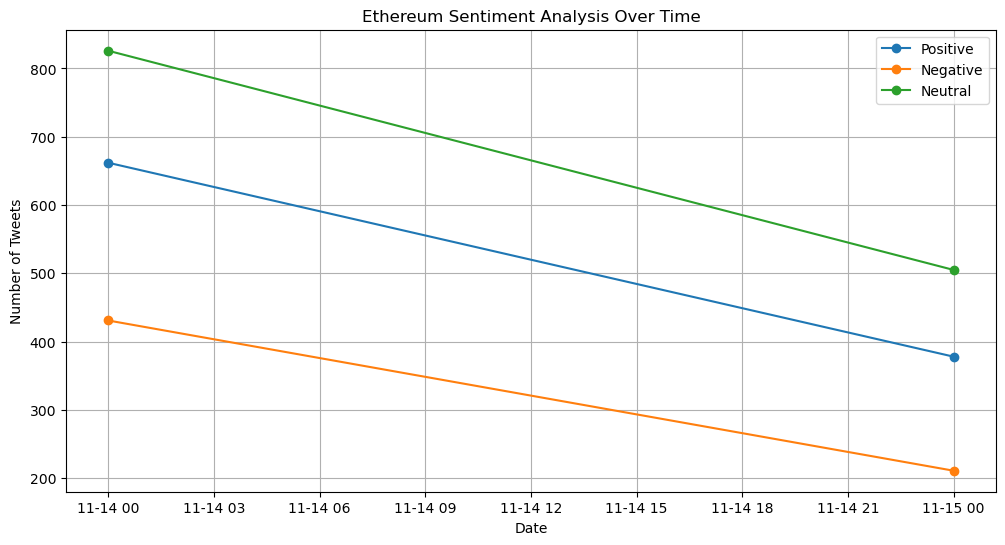

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_sentiment is your DataFrame with 'date' and 'sentiment' columns
# Convert the 'date' column to datetime
# Convert the 'date' column to datetime with the correct format
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d %H:%M:%S')

# Group the data by date and sentiment, then count the number of tweets
sentiment_counts = df_sentiment.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Resample the data by day and fill any missing dates
sentiment_counts = sentiment_counts.resample('D').sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(sentiment_counts.index, sentiment_counts['positive'], label='Positive', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['negative'], label='Negative', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['neutral'], label='Neutral', marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Ethereum Sentiment Analysis Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()